      I1         k         t1     I2          t2
0  5.521  0.007031  28.108333  6.069  106.683333
1  7.729  0.007769  18.816667  8.116   70.975000
2  6.673  0.008409  27.275000  7.291  103.500000
3  7.576  0.008653  23.050000  8.112   87.575000
4  8.616  0.009062  18.816667  9.061   71.466667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I1      129 non-null    float64
 1   k       129 non-null    float64
 2   t1      129 non-null    float64
 3   I2      129 non-null    float64
 4   t2      129 non-null    float64
dtypes: float64(5)
memory usage: 5.2 KB
None
[[0 1]
 [0 3]
 [1 0]
 [1 3]
 [2 4]
 [3 0]
 [3 1]
 [4 2]]


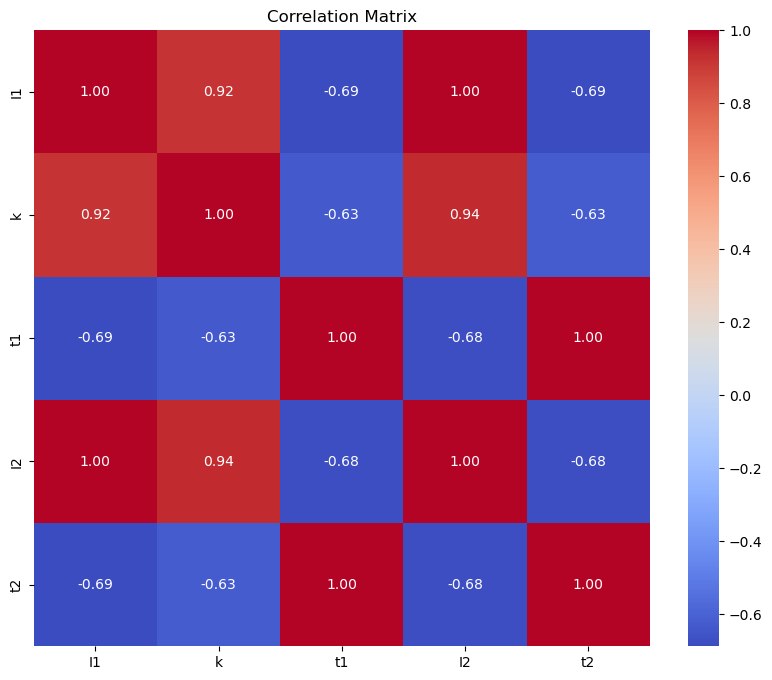

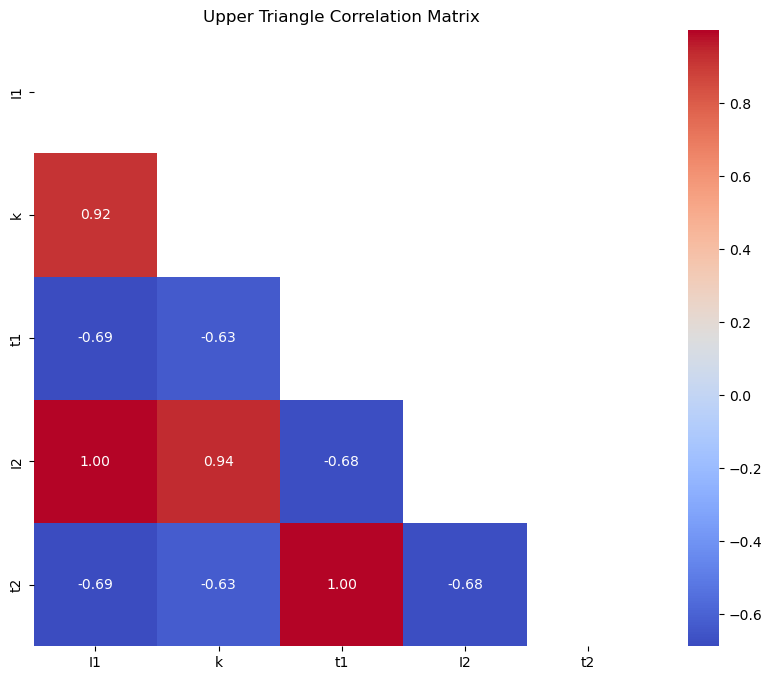

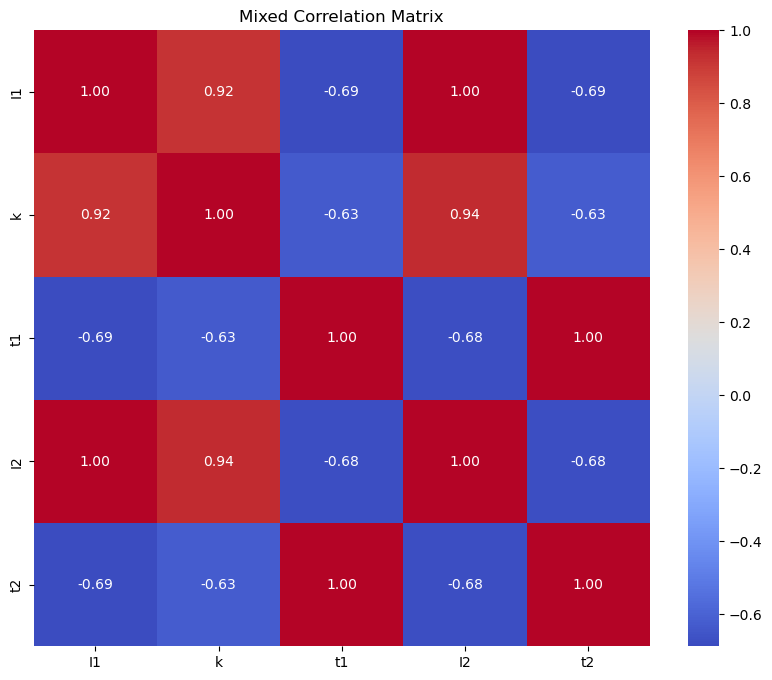

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('current_feature_best_slope_multiplier.csv')
print(data.head())  # 显示数据的前几行
print(data.info())  # 显示数据的结构信息

# 计算相关系数矩阵
p_xg = data.corr()
p_xg.to_csv('pcc_result.csv')  # 保存相关系数矩阵

# 转换为NumPy矩阵
matrix_pxg = p_xg.values

# 设置相关系数阈值
pcc = 0.85

# 找出相关系数大于阈值的值
greater_than_pcc = np.argwhere((matrix_pxg > pcc) & (np.arange(len(matrix_pxg))[:, None] != np.arange(len(matrix_pxg))))
print(greater_than_pcc)

# 保存相关系数大于阈值的行列索引
m = pd.DataFrame(greater_than_pcc, columns=['Row', 'Column'])
m.to_csv(f"pcc_{pcc}.csv")

# 绘制相关系数矩阵图
plt.figure(figsize=(10, 8))
sns.heatmap(p_xg, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# 绘制上三角相关系数图
mask = np.triu(np.ones_like(p_xg, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(p_xg, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Upper Triangle Correlation Matrix')
plt.savefig('upper_triangle_correlation_matrix.png')
plt.show()

# 混合方法绘制相关系数图
plt.figure(figsize=(10, 8))
sns.heatmap(p_xg, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Mixed Correlation Matrix')
plt.savefig('mixed_correlation_matrix.png')
plt.show()
